In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [8]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [33]:

train = pd.read_csv('data/train.csv')
train.fillna(0, inplace= True)

### Univariate Analysis

In [34]:

#standardizing target value

purchase_sca = StandardScaler().fit_transform(train['Purchase'][:,np.newaxis])
low_range = purchase_sca[purchase_sca[:,0].argsort()][:10]
high_range= purchase_sca[purchase_sca[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

/Users/Faliha/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/Faliha/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


outer range (low) of the distribution:
[[-1.8418986]
 [-1.8418986]
 [-1.8418986]
 [-1.8418986]
 [-1.8418986]
 [-1.8418986]
 [-1.8418986]
 [-1.8418986]
 [-1.8418986]
 [-1.8418986]]

outer range (high) of the distribution:
[[2.92531422]
 [2.92551331]
 [2.92551331]
 [2.92571239]
 [2.92571239]
 [2.92571239]
 [2.92571239]
 [2.92591147]
 [2.92591147]
 [2.92591147]]


/Users/Faliha/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


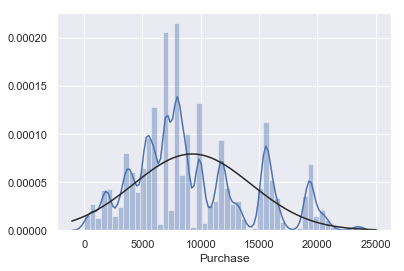

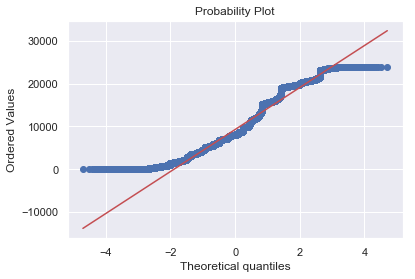

In [35]:
# Check distribution of target value & its probability plot


sns.distplot(train['Purchase'], fit= norm);
fig = plt.figure()
res = stats.probplot(train['Purchase'], plot=plt);

#### Univariate Analysis Summary
Based on graph above, we can find our target 'Purchase' is hugely skewed, try to split data before 15000 and after into two datasets

In [36]:
train_small=train.loc[train['Purchase'] <15000] 

/Users/Faliha/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


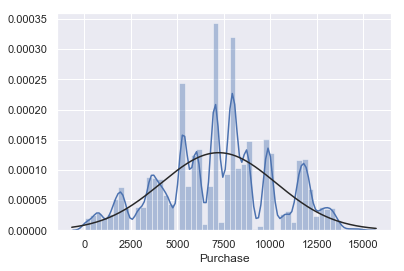

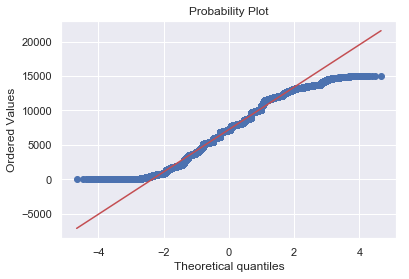

In [37]:
sns.distplot(train_small['Purchase'], fit= norm);
fig = plt.figure()
res = stats.probplot(train_small['Purchase'], plot=plt);

In [38]:
train_middle=train.loc[(train['Purchase'] > 15000) & (train['Purchase'] < 18000)] 

/Users/Faliha/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


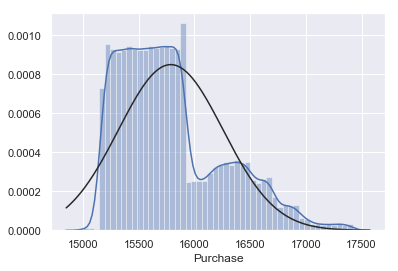

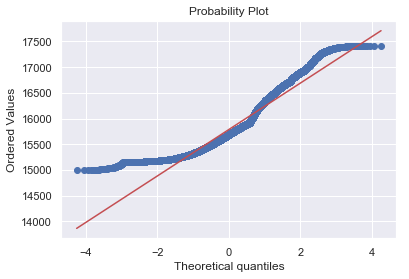

In [39]:
sns.distplot(train_middle['Purchase'], fit= norm);
fig = plt.figure()
res = stats.probplot(train_middle['Purchase'], plot=plt);

In [40]:
# Split data before or after 15000
#cutoff_purchase = np.percentile(train['Purchase'], 99.9)  # 99.9 percentile (6 sigma in normal)
train_big=train.loc[train['Purchase'] >18000 ] 

/Users/Faliha/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


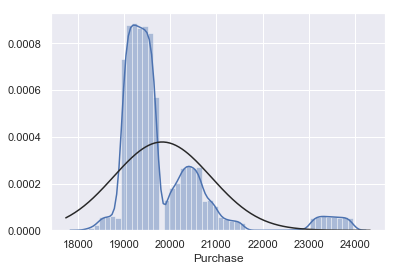

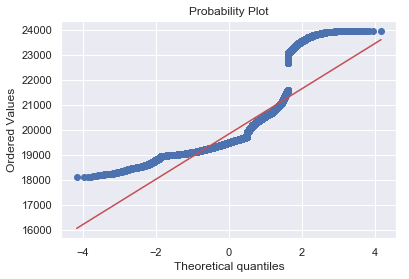

In [41]:
sns.distplot(train_big['Purchase'], fit= norm);
fig = plt.figure()
res = stats.probplot(train_big['Purchase'], plot=plt);

### Multivariate Analysis

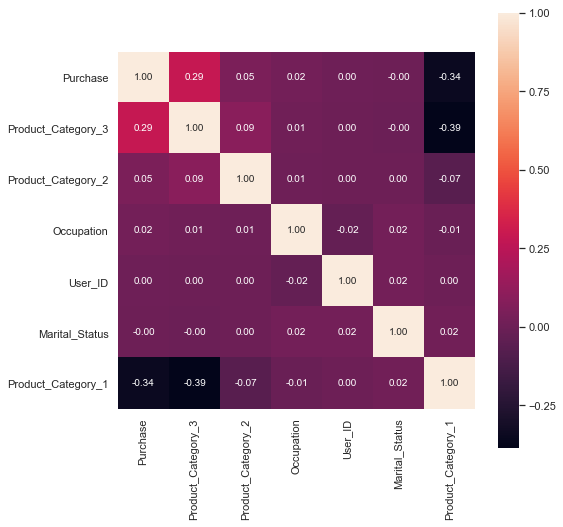

In [42]:


k = 12 #number of variales for heatmap
corrmat = train.corr()
cols = corrmat.nlargest(k, 'Purchase')['Purchase'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, ax=ax)
plt.show()

In [ ]:
sns.pairplot(train, size=2.5)
plt.show();

/Users/Faliha/miniconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


#### Multivariate Analysis Summary
    1. Heatmap: correlation between features or between feature and target is not strong
    2. Pairplot: no linear relationship between feature and target
    3. overall, based on graph above, none of these techniques apply here, also confirmed that our data is better for non-linear model

In [32]:
from featexp import get_univariate_plots

get_univariate_plots(data=train, target_col='Purchase', 
                     features_list=['Product_Category_1'], bins=10)

NameError: name 'get_univariate_plots' is not defined

## GBM

In [153]:
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor(learning_rate=0.1,
                                n_estimators=690,
                                max_depth=8,
                                subsample=0.8,
                                random_state=123)

In [155]:
untuned_bgm_mse_cv = -cross_val_score(gbt, feature_, target, verbose=1,scoring='neg_mean_squared_error',cv=5, n_jobs=-1)

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 58.9min finished


In [163]:
untuned_bgm_rmse_cv=np.sqrt(untuned_bgm_mse_cv)
print(untuned_bgm_rmse_cv.mean())

2604.969392833252
